# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaeld\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "toute", "pendant", "moins", "dire", "cela", "non","grand"
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "TÉL", "tél", "téléph", "tel", "RUE", "rue",
       "BRUXELLES", "Bruxelles", "bruxelles", "Brux",
       "PRIX", "prix", "TRÈS", "très", "ANS", "ans", "MAISON", "maison", "APP", "app", "appart",
        "BON", "bon", "Ecrire", "ECR", "ecr", "écrire", "grand", "petit", "heures", "part",
        "mois", "place", "soir", "matin", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi",
        "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre",
        "octobre", "novembre", "décembre", "année", "Mme", "madame", "partir", "larg", "mètre",
        "pays", "PAYS", "libre", "Libre", "mod", "grande", "GRANDE", "cours", "conf",
        "LOUER", "louer", "VENDRE", "vendre", "LEURS", "leurs", "très", "jours", "demande", "vis",
        "peu", "chaque", "adr", "alors", "ceux", "déjà", "vend", "trop", "près", "vers", "frs",
        "francs", "mètres", "plusieurs", "rez", "culs", "chez", "conf", "agence", "etc"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [29]:
# Choisir une année
year = 1953

In [30]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [31]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [32]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [33]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"SAMEDI 3 JANVIER 1953 ■ LE SOBI Il • Bien sur,il y a des SOLDES partout ...mais a 1 /\\ \\m irm n y a des •• NOS SOLDES DE CETTE ANNEE DEPASSENTIEN MME m L’ON PEÜTMGINER. =^;\\tv£ m. ■ — •*. vv .'i3r . «"

In [34]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [35]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'SAMEDI 3 JANVIER 1953 ■ LE SOBI Il • Bien sur,il y a des SOLDES partout ...mais a 1 /\\ \\m irm n y a des •• NOS SOLDES DE CETTE ANNEE DEPASSENTIEN MME m L’ON PEÜTMGINER. =^;\\tv£ m. ■ — •*. vv .\'i3r . « *.«*»•* ?.^ssr • ^ .«.V* ""•i POUR MADAME POUR LES MOUCHOIRS à partir de 4 LAINE DEMI-CHASSE Les 100 grs. à partir de 4 A jjQ Fr. IWi TABLIERS pour dame ou jeune fille, à partir de AQ JST- Fr. UVi* CHAPEAUX à partir de A -80? Fr. V. j BLOUSES pour dame ou jeune fille. f| à partir de « U j59?Fr. UVi'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [76]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [77]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1953_clean.txt!'

In [78]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'SOBI SOLDES PARTOUT IRM SOLDES ANNEE DEPASSENTIEN MME PEÜTMGINER SSR MOUCHOIRS LAINE DEMI CHASSE GRS JJQ IWI TABLIERS DAME JEUNE FILLE JST UVI CHAPEAUX BLOUSES DAME JEUNE FILLE UVI PEIGNOIRS JEUNE FILLE ULVI SOUTIENS GORGE PULL OVERS JHWC ÎFO PEIGNOIRS DAME UÜV CULOTTES JAMBES SACS JUPES DAME JEUNE FILLE JKWR CHEMISES EMPIRE UUI GANTS SUÈDE XIST JVI ROBES DAME JEUNE FILLE UIV BAS NYLON JJQ TTVI CHAUSSURES VWI MANTEAUX DAME JEUNE FILLE COMBINAISONS OWB PARAPLUIES MANTEAUX FOURRURE DAME JEUNE FILL'

## Nuage de mots

### Afficher les termes les plus fréquents


In [79]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('ECRIRE', 514), ('BRUX', 474), ('BELGIQUE', 365), ('PRÉSIDENT', 360), ('BELGE', 330), ('ÉTAT', 325), ('FRANCE', 315), ('ANVERS', 314), ('VENTE', 309), ('TEMPS', 305)]


### Créer, stocker et afficher le nuage de mots

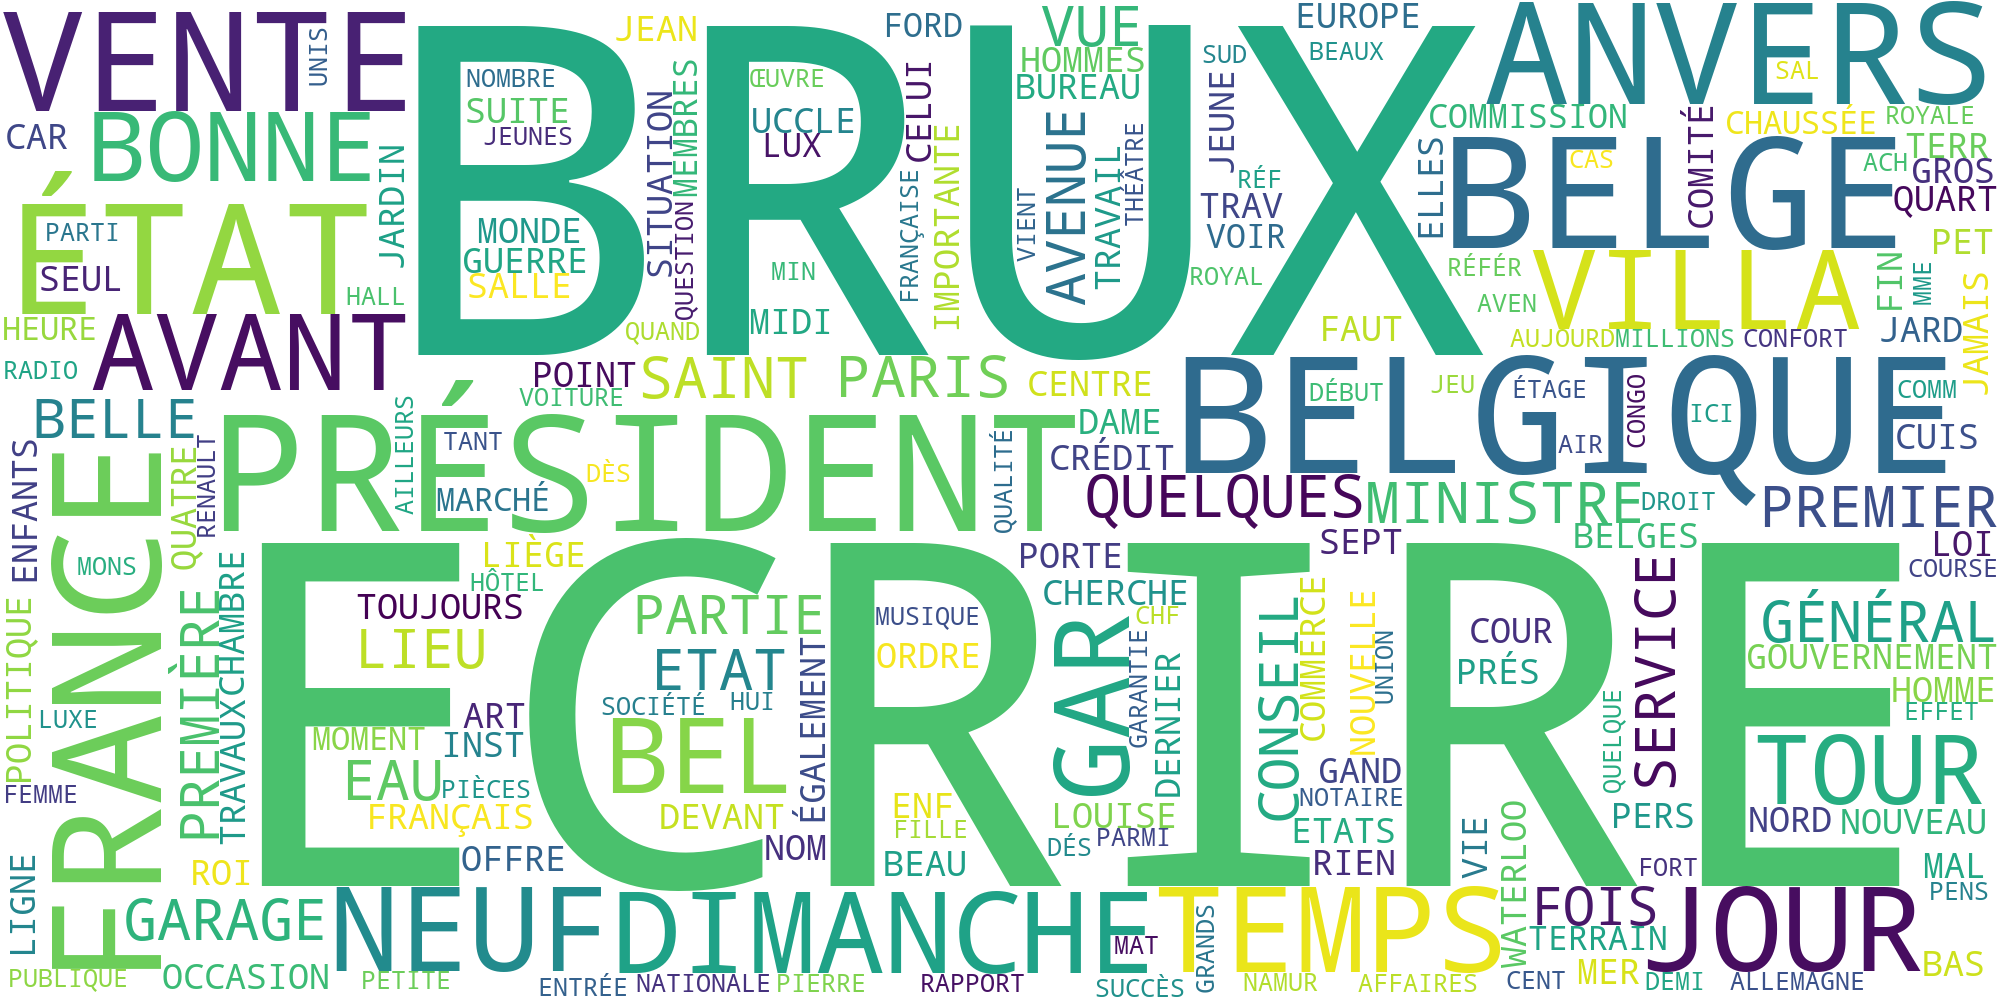

In [80]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))